<a href="https://colab.research.google.com/github/mannickutd/wikipedia_movie_plots/blob/master/wikipedia_movie_genre_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [168]:
!git clone https://github.com/facebookresearch/fastText.git
!cd fastText/
!make
!cd ..

fatal: destination path 'fastText' already exists and is not an empty directory.
make: Nothing to be done for 'opt'.


In [169]:
!pip install pandas
!pip install numpy
!pip install sklearn
import re
import pandas
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [170]:
!wget https://s3.eu-west-2.amazonaws.com/wikipedia-movie-plots/wikipedia-movie-plots.zip -O wikipedia-movie-plots.zip

--2018-12-25 17:20:13--  https://s3.eu-west-2.amazonaws.com/wikipedia-movie-plots/wikipedia-movie-plots.zip
Resolving s3.eu-west-2.amazonaws.com (s3.eu-west-2.amazonaws.com)... 52.95.150.44
Connecting to s3.eu-west-2.amazonaws.com (s3.eu-west-2.amazonaws.com)|52.95.150.44|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30978474 (30M) [application/zip]
Saving to: ‘wikipedia-movie-plots.zip’

wikipedia-movie-plo 100%[===================>]  29.54M  20.8MB/s    in 1.4s    

2018-12-25 17:20:14 (20.8 MB/s) - ‘wikipedia-movie-plots.zip’ saved [30978474/30978474]



In [171]:
!unzip wikipedia-movie-plots.zip

Archive:  wikipedia-movie-plots.zip
  inflating: wiki_movie_plots_deduped.csv  


In [0]:
df = pandas.read_csv("wiki_movie_plots_deduped.csv")

In [173]:
df.columns

Index(['Release Year', 'Title', 'Origin/Ethnicity', 'Director', 'Cast',
       'Genre', 'Wiki Page', 'Plot'],
      dtype='object')

In [174]:
df['Genre']

0                           unknown
1                           unknown
2                           unknown
3                           unknown
4                           unknown
5                           unknown
6                           western
7                            comedy
8                           unknown
9                           unknown
10                            short
11       short action/crime western
12                       short film
13                     biographical
14                           comedy
15                           comedy
16                            drama
17                            drama
18                           comedy
19                        adventure
20                            drama
21                          western
22                            drama
23                            drama
24                            drama
25                          unknown
26                            drama
27                          

In [175]:
df['Count'] = 1
df[['Genre','Count']].groupby(['Genre'], as_index=False).count().shape[0]
# The number of genres is way to high to provide reliable classification
# Lots of duplication of genre categories and overlap, we need a way to simplify the genre categorization

2265

In [0]:
# Pulled from kaggle example
df['GenreCorrected'] = df['Genre'] 
df['GenreCorrected'] = df['GenreCorrected'].str.strip()
df['GenreCorrected'] = df['GenreCorrected'].str.replace(' - ', '|')
df['GenreCorrected'] = df['GenreCorrected'].str.replace(' / ', '|')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('/', '|')
df['GenreCorrected'] = df['GenreCorrected'].str.replace(' & ', '|')
df['GenreCorrected'] = df['GenreCorrected'].str.replace(', ', '|')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('; ', '|')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('bio-pic', 'biography')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('biopic', 'biography')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('biographical', 'biography')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('biodrama', 'biography')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('bio-drama', 'biography')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('biographic', 'biography')
df['GenreCorrected'] = df['GenreCorrected'].str.replace(' \(film genre\)', '')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('animated','animation')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('anime','animation')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('children\'s','children')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('comedey','comedy')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('\[not in citation given\]','')
df['GenreCorrected'] = df['GenreCorrected'].str.replace(' set 4,000 years ago in the canadian arctic','')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('historical','history')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('romantic','romance')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('3-d','animation')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('3d','animation')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('viacom 18 motion pictures','')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('sci-fi','science_fiction')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('ttriller','thriller')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('.','')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('based on radio serial','')
df['GenreCorrected'] = df['GenreCorrected'].str.replace(' on the early years of hitler','')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('sci fi','science_fiction')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('science fiction','science_fiction')
df['GenreCorrected'] = df['GenreCorrected'].str.replace(' (30min)','')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('16 mm film','short')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('\[140\]','drama')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('\[144\]','')
df['GenreCorrected'] = df['GenreCorrected'].str.replace(' for ','')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('adventures','adventure')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('kung fu','martial_arts')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('kung-fu','martial_arts')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('martial arts','martial_arts')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('world war ii','war')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('world war i','war')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('biography about montreal canadiens star|maurice richard','biography')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('bholenath movies|cinekorn entertainment','')
df['GenreCorrected'] = df['GenreCorrected'].str.replace(' \(volleyball\)','')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('spy film','spy')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('anthology film','anthology')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('biography fim','biography')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('avant-garde','avant_garde')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('biker film','biker')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('buddy cop','buddy')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('buddy film','buddy')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('comedy 2-reeler','comedy')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('films','')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('film','')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('biography of pioneering american photographer eadweard muybridge','biography')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('british-german co-production','')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('bruceploitation','martial_arts')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('comedy-drama adaptation of the mordecai richler novel','comedy-drama')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('movies by the mob\|knkspl','')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('movies','')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('movie','')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('coming of age','coming_of_age')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('coming-of-age','coming_of_age')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('drama about child soldiers','drama')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('(( based).+)','')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('(( co-produced).+)','')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('(( adapted).+)','')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('(( about).+)','')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('musical b','musical')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('animationchildren','animation|children')
df['GenreCorrected'] = df['GenreCorrected'].str.replace(' period','period')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('drama loosely','drama')
df['GenreCorrected'] = df['GenreCorrected'].str.replace(' \(aquatics|swimming\)','')
df['GenreCorrected'] = df['GenreCorrected'].str.replace(' \(aquatics|swimming\)','')
df['GenreCorrected'] = df['GenreCorrected'].str.replace("yogesh dattatraya gosavi's directorial debut \[9\]",'')
df['GenreCorrected'] = df['GenreCorrected'].str.replace("war-time","war")
df['GenreCorrected'] = df['GenreCorrected'].str.replace("wartime","war")
df['GenreCorrected'] = df['GenreCorrected'].str.replace("ww1","war")
df['GenreCorrected'] = df['GenreCorrected'].str.replace('unknown','')
df['GenreCorrected'] = df['GenreCorrected'].str.replace("wwii","war")
df['GenreCorrected'] = df['GenreCorrected'].str.replace('psychological','psycho')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('rom-coms','romance')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('true crime','crime')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('\|007','')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('slice of life','slice_of_life')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('computer animation','animation')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('gun fu','martial_arts')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('j-horror','horror')
df['GenreCorrected'] = df['GenreCorrected'].str.replace(' \(shogi|chess\)','')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('afghan war drama','war drama')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('\|6 separate stories','')
df['GenreCorrected'] = df['GenreCorrected'].str.replace(' \(30min\)','')
df['GenreCorrected'] = df['GenreCorrected'].str.replace(' (road bicycle racing)','')
df['GenreCorrected'] = df['GenreCorrected'].str.replace(' v-cinema','')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('tv miniseries','tv_miniseries')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('\|docudrama','\|documentary|drama')
df['GenreCorrected'] = df['GenreCorrected'].str.replace(' in animation','|animation')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('((adaptation).+)','')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('((adaptated).+)','')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('((adapted).+)','')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('(( on ).+)','')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('american football','sports')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('dev\|nusrat jahan','sports')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('television miniseries','tv_miniseries')
df['GenreCorrected'] = df['GenreCorrected'].str.replace(' \(artistic\)','')
df['GenreCorrected'] = df['GenreCorrected'].str.replace(' \|direct-to-dvd','')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('history dram','history drama')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('martial art','martial_arts')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('psycho thriller,','psycho thriller')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('\|1 girl\|3 suitors','')
df['GenreCorrected'] = df['GenreCorrected'].str.replace(' \(road bicycle racing\)','')
filterE = df['GenreCorrected'] == "ero"
df.loc[filterE,'GenreCorrected'] = "adult"
filterE = df['GenreCorrected'] == "music"
df.loc[filterE,'GenreCorrected']="musical"
filterE = df['GenreCorrected'] == "-"
df.loc[filterE,'GenreCorrected'] = ''
filterE = df['GenreCorrected'] == "comedy–drama"
df.loc[filterE,'GenreCorrected'] = "comedy|drama"
filterE = df['GenreCorrected'] == "comedy–horror"
df.loc[filterE,'GenreCorrected'] = "comedy|horror"
df['GenreCorrected'] = df['GenreCorrected'].str.replace(' ','|')
df['GenreCorrected'] = df['GenreCorrected'].str.replace(',','|')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('-','')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('actionadventure','action|adventure')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('actioncomedy','action|comedy')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('actiondrama','action|drama')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('actionlove','action|love')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('actionmasala','action|masala')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('actionchildren','action|children')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('fantasychildren\|','fantasy|children')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('fantasycomedy','fantasy|comedy')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('fantasyperiod','fantasy|period')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('cbctv_miniseries','tv_miniseries')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('dramacomedy','drama|comedy')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('dramacomedysocial','drama|comedy|social')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('dramathriller','drama|thriller')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('comedydrama','comedy|drama')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('dramathriller','drama|thriller')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('comedyhorror','comedy|horror')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('sciencefiction','science_fiction')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('adventurecomedy','adventure|comedy')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('animationdrama','animation|drama')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('\|\|','|')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('muslim','religious')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('thriler','thriller')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('crimethriller','crime|thriller')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('fantay','fantasy')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('actionthriller','action|thriller')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('comedysocial','comedy|social')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('martialarts','martial_arts')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('\|\(children\|poker\|karuta\)','')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('epichistory','epic|history')

df['GenreCorrected'] = df['GenreCorrected'].str.replace('erotica','adult')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('erotic','adult')

df['GenreCorrected'] = df['GenreCorrected'].str.replace('((\|produced\|).+)','')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('chanbara','chambara')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('comedythriller','comedy|thriller')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('biblical','religious')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('biblical','religious')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('colour\|yellow\|productions\|eros\|international','')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('\|directtodvd','')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('liveaction','live|action')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('melodrama','drama')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('superheroes','superheroe')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('gangsterthriller','gangster|thriller')

df['GenreCorrected'] = df['GenreCorrected'].str.replace('heistcomedy','comedy')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('heist','action')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('historic','history')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('historydisaster','history|disaster')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('warcomedy','war|comedy')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('westerncomedy','western|comedy')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('ancientcostume','costume')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('computeranimation','animation')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('dramatic','drama')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('familya','family')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('familya','family')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('dramedy','drama|comedy')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('dramaa','drama')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('famil\|','family')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('superheroe','superhero')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('biogtaphy','biography')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('devotionalbiography','devotional|biography')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('docufiction','documentary|fiction')

df['GenreCorrected'] = df['GenreCorrected'].str.replace('familydrama','family|drama')

df['GenreCorrected'] = df['GenreCorrected'].str.replace('espionage','spy')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('supeheroes','superhero')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('romancefiction','romance|fiction')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('horrorthriller','horror|thriller')

df['GenreCorrected'] = df['GenreCorrected'].str.replace('suspensethriller','suspense|thriller')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('musicaliography','musical|biography')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('triller','thriller')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('\|\(fiction\)','|fiction')

df['GenreCorrected'] = df['GenreCorrected'].str.replace('romanceaction','romance|action')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('romancecomedy','romance|comedy')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('romancehorror','romance|horror')

df['GenreCorrected'] = df['GenreCorrected'].str.replace('romcom','romance|comedy')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('rom\|com','romance|comedy')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('satirical','satire')

df['GenreCorrected'] = df['GenreCorrected'].str.replace('science_fictionchildren','science_fiction|children')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('homosexual','adult')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('sexual','adult')

df['GenreCorrected'] = df['GenreCorrected'].str.replace('mockumentary','documentary')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('periodic','period')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('romanctic','romantic')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('politics','political')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('samurai','martial_arts')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('tv_miniseries','series')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('serial','series')

filterE = df['GenreCorrected'] == "musical–comedy"
df.loc[filterE,'GenreCorrected'] = "musical|comedy"

filterE = df['GenreCorrected'] == "roman|porno"
df.loc[filterE,'GenreCorrected'] = "adult"

filterE = df['GenreCorrected'] == "action—masala"
df.loc[filterE,'GenreCorrected'] = "action|masala"


filterE = df['GenreCorrected'] == "horror–thriller"
df.loc[filterE,'GenreCorrected'] = "horror|thriller"

df['GenreCorrected'] = df['GenreCorrected'].str.replace('family','children')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('martial_arts','action')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('horror','thriller')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('war','action')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('adventure','action')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('science_fiction','action')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('western','action')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('western','action')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('noir','black')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('spy','action')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('superhero','action')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('social','')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('suspense','action')


filterE = df['GenreCorrected'] == "drama|romance|adult|children"
df.loc[filterE,'GenreCorrected'] = "drama|romance|adult"

df['GenreCorrected'] = df['GenreCorrected'].str.replace('\|–\|','|')
df['GenreCorrected'] = df['GenreCorrected'].str.strip(to_strip='\|')
df['GenreCorrected'] = df['GenreCorrected'].str.replace('actionner','action')
df['GenreCorrected'] = df['GenreCorrected'].str.strip()

In [177]:
df[['GenreCorrected','Count']].groupby(['GenreCorrected'],as_index=False).count().sort_values(['Count'], ascending=False).head(10)

,GenreCorrected,Count
0,,6206
516,drama,6107
359,comedy,4411
2,action,3790
1111,thriller,2163
964,romance,954
203,animation,601
973,romance|comedy,577
447,crime,573
387,comedy|drama,560


In [0]:
df['GenreSplit'] = df['GenreCorrected'].str.split('|')
df['GenreSplit'] = df['GenreSplit'].apply(np.sort).apply(np.unique)

In [179]:
genres_array = np.array([])

for i in range(0, df.shape[0]-1):
    genres_array = np.concatenate((genres_array, df['GenreSplit'][i] ))
    
genres_array

array(['', '', '', ..., 'comedy', 'comedy', 'romance'], dtype='<U32')

In [0]:
genres = pandas.DataFrame({'Genre': genres_array})

In [181]:
genres.head(10)

,Genre
0,
1,
2,
3,
4,
5,
6,action
7,comedy
8,
9,


In [182]:
genres['Count'] = 1
genres[['Genre','Count']].groupby(['Genre'], as_index=False).sum().sort_values(['Count'], ascending=False).head(10)

,Genre,Count
116,drama,9487
85,comedy,7320
0,,6222
4,action,5952
426,thriller,3291
337,romance,2639
94,crime,1607
244,musical,951
16,animation,914
73,children,684


In [0]:
genres = genres[['Genre','Count']].groupby(['Genre'], as_index=False).sum().sort_values(['Count'], ascending=False)

In [184]:
genres = genres[genres['Genre'] != '']
genres.head(25)

,Genre,Count
116,drama,9487
85,comedy,7320
4,action,5952
426,thriller,3291
337,romance,2639
94,crime,1607
244,musical,951
16,animation,914
73,children,684
131,fantasy,542


In [0]:
TotalCountGenres = sum(genres['Count'])

In [0]:
genres['Frequency'] = genres['Count'] / TotalCountGenres

In [0]:
genres['CumulativeFrequency'] = genres['Frequency'].cumsum()

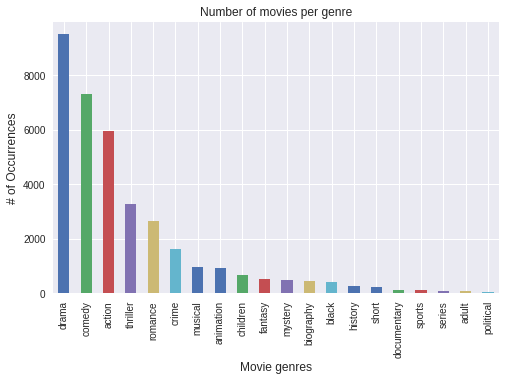

In [188]:
genres[genres['CumulativeFrequency']<=.957][['Genre','Count']].plot(x='Genre', y='Count', kind='bar', legend=False, grid=True, figsize=(8, 5))
plt.title("Number of movies per genre")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('Movie genres', fontsize=12)
plt.show()

In [189]:
genres.shape

(459, 4)

In [190]:
genres.columns

Index(['Genre', 'Count', 'Frequency', 'CumulativeFrequency'], dtype='object')

In [191]:
genres.head()

,Genre,Count,Frequency,CumulativeFrequency
116,drama,9487,0.254200,0.254200
85,comedy,7320,0.196136,0.450336
4,action,5952,0.159481,0.609818
426,thriller,3291,0.088181,0.697998
337,romance,2639,0.070711,0.768709


In [192]:
df.shape

(34886, 11)

In [193]:
df.columns

Index(['Release Year', 'Title', 'Origin/Ethnicity', 'Director', 'Cast',
       'Genre', 'Wiki Page', 'Plot', 'Count', 'GenreCorrected', 'GenreSplit'],
      dtype='object')

In [194]:
df.head

<bound method NDFrame.head of        Release Year                                              Title  \
0              1901                             Kansas Saloon Smashers   
1              1901                      Love by the Light of the Moon   
2              1901                            The Martyred Presidents   
3              1901                   Terrible Teddy, the Grizzly King   
4              1902                             Jack and the Beanstalk   
5              1903                                Alice in Wonderland   
6              1903                            The Great Train Robbery   
7              1904                                    The Suburbanite   
8              1905                           The Little Train Robbery   
9              1905                         The Night Before Christmas   
10             1906                           Dream of a Rarebit Fiend   
11             1906  From Leadville to Aspen: A Hold-Up in the Rockies   
12      

In [195]:
df.columns

Index(['Release Year', 'Title', 'Origin/Ethnicity', 'Director', 'Cast',
       'Genre', 'Wiki Page', 'Plot', 'Count', 'GenreCorrected', 'GenreSplit'],
      dtype='object')

In [196]:
df['GenreSplit']

0                            []
1                            []
2                            []
3                            []
4                            []
5                            []
6                      [action]
7                      [comedy]
8                            []
9                            []
10                      [short]
11       [action, crime, short]
12                      [short]
13                  [biography]
14                     [comedy]
15                     [comedy]
16                      [drama]
17                      [drama]
18                     [comedy]
19                     [action]
20                      [drama]
21                     [action]
22                      [drama]
23                      [drama]
24                      [drama]
25                           []
26                      [drama]
27                           []
28                           []
29                     [comedy]
                  ...          
34856   

In [0]:
mainGenres = np.array(genres[genres['CumulativeFrequency']<=.957]['Genre'])

In [198]:
mainGenres

array(['drama', 'comedy', 'action', 'thriller', 'romance', 'crime',
       'musical', 'animation', 'children', 'fantasy', 'mystery',
       'biography', 'black', 'history', 'short', 'documentary', 'sports',
       'series', 'adult', 'political'], dtype=object)

In [0]:
df['GenreSplitMain'] = df['GenreSplit'].apply(lambda x: x[np.in1d(x, mainGenres)])

In [200]:
df.columns

Index(['Release Year', 'Title', 'Origin/Ethnicity', 'Director', 'Cast',
       'Genre', 'Wiki Page', 'Plot', 'Count', 'GenreCorrected', 'GenreSplit',
       'GenreSplitMain'],
      dtype='object')

In [0]:
df = pandas.concat([df, df.GenreSplitMain.apply(lambda x: '-'.join(x)).str.get_dummies(sep='-')], axis=1)

In [202]:
df.columns

Index(['Release Year', 'Title', 'Origin/Ethnicity', 'Director', 'Cast',
       'Genre', 'Wiki Page', 'Plot', 'Count', 'GenreCorrected', 'GenreSplit',
       'GenreSplitMain', 'action', 'adult', 'animation', 'biography', 'black',
       'children', 'comedy', 'crime', 'documentary', 'drama', 'fantasy',
       'history', 'musical', 'mystery', 'political', 'romance', 'series',
       'short', 'sports', 'thriller'],
      dtype='object')

In [0]:
# function for cleaning the plots of the movies
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "can not ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = text.replace('\n', ' ').replace('\r', '')
    #text = re.sub('\W', ' ', text)
    #text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text

In [0]:
df['PlotClean'] = df['Plot'].apply(clean_text)

In [0]:
dfTrain, dfTest = train_test_split(df[df.GenreCorrected!=''], random_state=42, test_size=0.30, shuffle=True)

In [0]:
with open("train.txt", "w") as fle:
  for index, row in dfTrain.iterrows():
    if row['drama']:
      fle.write("__label__drama {0}\n".format(row['PlotClean']))
    else:
      fle.write("__label__not_drama {0}\n".format(row['PlotClean']))
      
with open("test.txt", "w") as fle:
  for index, row in dfTest.iterrows():
    if row['drama']:
      fle.write("__label__drama {0}\n".format(row['PlotClean']))
    else:
      fle.write("__label__not_drama {0}\n".format(row['PlotClean']))
    

In [230]:
print(dfTrain.shape)
!tail train.txt
! echo ""
print(dfTest.shape)
!tail test.txt

(20076, 33)
__label__not_drama in the city of piqua, ohio, two fourth-grade friends and next-door neighbors named george beard (kevin hart) and harold hutchins (thomas middleditch) are the pranksters at their school, jerome horwitz elementary school. they excessively pull numerous pranks on the cruel teachers, many of which are directed at their "evil" principal, mr. benjamin "benny" krupp (ed helms), putting the two at odds with him. the duo also create comic books about a superhero named captain underpants, a character who has superpowers and wears underwear and a cape. they sell these to their schoolmates through a comic company called treehouse comix inc., located in their treehouse. george and harold  pranks come to an apparent end after they are  caught tampering with a toilet invention, the turbo toilet 2000, made by the school  local snitch and intellectual, melvin sneedly (jordan peele), on video. finally having solid proof of the boys' antics, mr. krupp excitedly prepares to 

In [231]:
!./fasttext supervised -input train.txt -output model

Read 7M words
Number of words:  256034
Number of labels: 2
Progress: 100.0% words/sec/thread:  484620 lr:  0.000000 loss:  0.581957 ETA:   0h 0m


In [232]:
!./fasttext test model.bin test.txt

N	8604
P@1	0.705
R@1	0.705
